In [1]:
import math
import numpy as np
import tensorflow as tf

import os
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

/home/nlp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
'''
Generator
- input: noises (batch_size, noise_dim)
- output: images (batch_size, height, width, channels)
- arthitecture: CNN, DNN
- use deconvolution (transpose convolution) layer in CNN
'''


class Generator:
    
    def __init__(self):
        self._build()
    
    
    def _build(self):
        self.output_height = 64
        self.output_width = 64
        self.noise_dim = 100
        self.noise_placeholder = tf.placeholder(dtype=tf.float32, 
                                                shape=[10, self.noise_dim], 
                                                name="noise_placeholder")
        # 64*64 <- 32 * 32 <- 16*16 <- 8*8 <- 4*4
        s_h, s_w = self.output_height, self.output_width
        s_h2, s_w2 = int(math.ceil(s_h/2)), int(math.ceil(s_w/2))
        s_h4, s_w4 = int(math.ceil(s_h2/2)), int(math.ceil(s_w2/2))
        s_h8, s_w8 = int(math.ceil(s_h4/2)), int(math.ceil(s_w4/2))
        s_h16, s_w16 = int(math.ceil(s_h8/2)), int(math.ceil(s_w8/2))

        output0_ = tf.layers.dense(inputs=self.noise_placeholder, 
                             units=64 * s_h16 * s_w16,
                             activation=tf.nn.relu,
                             kernel_initializer=tf.contrib.layers.xavier_initializer(),
                             name="dense0")
        output0 = tf.reshape(output0_, [-1, s_h16, s_w16, 64])
        
        output1_ = tf.nn.conv2d_transpose(output0, 
                                          filter=tf.get_variable('filter1', [5, 5, 32, 64],
                                                                 initializer=tf.contrib.layers.xavier_initializer()),
                                          output_shape=[10, s_h8, s_w8, 32], 
                                          strides=[1,2,2,1], 
                                          name="deconv1")
        output1 = tf.nn.relu(output1_)

        output2_ = tf.nn.conv2d_transpose(output1, 
                                          filter=tf.get_variable('filter2', [5, 5, 16, 32],
                                                                 initializer=tf.contrib.layers.xavier_initializer()),                                         
                                          output_shape=[10, s_h4, s_w4, 16], 
                                          strides=[1,2,2,1], 
                                          name="deconv2")
        output2 = tf.nn.relu(output2_)

        output3_ = tf.nn.conv2d_transpose(output2, 
                                          filter=tf.get_variable('filter3', [5, 5, 8, 16],
                                                                 initializer=tf.contrib.layers.xavier_initializer()),
                                          output_shape=[10, s_h2, s_w2, 8], 
                                          strides=[1,2,2,1], 
                                          name="deconv3")
        output3 = tf.nn.relu(output3_)

        output4_ = tf.nn.conv2d_transpose(output3, 
                                          filter=tf.get_variable('filter4', [5, 5, 3, 8],
                                                                 initializer=tf.contrib.layers.xavier_initializer()),
                                          output_shape=[10, s_h, s_w, 3], 
                                          strides=[1,2,2,1], 
                                          name="deconv4")
        self.batch_img = tf.nn.sigmoid(output4_)

    
    def generate_image(self, batch_noise):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            imgs = sess.run(self.batch_img, feed_dict={self.noise_placeholder: batch_noise})
            return imgs


generator = Generator()
batch_noise = np.random.random([10, 100])
imgs = generator.generate_image(batch_noise)

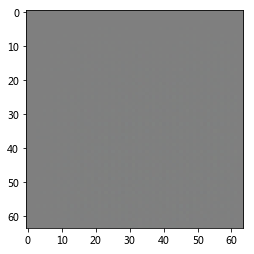

In [3]:
plt.imshow(imgs[0])

TypeError: Image data can not convert to float

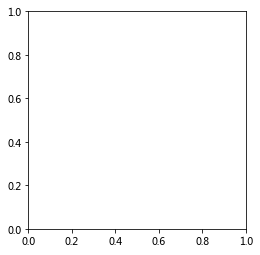

In [17]:
img = cv2.imread("../AnimeData_NTU/AnimeData/faces/1.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (64, 64))
img = img.resize((64, 64))
plt.imshow(img)

In [12]:
img.reshape

array([[[209,  94,  65],
        [209,  91,  63],
        [208,  84,  56],
        ...,
        [243, 121,  97],
        [228, 103,  81],
        [216,  91,  69]],

       [[207,  89,  61],
        [204,  84,  57],
        [202,  78,  52],
        ...,
        [242, 118,  94],
        [228, 103,  81],
        [218,  93,  71]],

       [[203,  83,  58],
        [198,  77,  50],
        [194,  68,  43],
        ...,
        [240, 114,  92],
        [227, 100,  81],
        [220,  93,  74]],

       ...,

       [[252, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [ 63,  69, 131],
        [ 65,  72, 142],
        [ 66,  72, 146]],

       [[251, 255, 255],
        [251, 255, 255],
        [252, 255, 255],
        ...,
        [ 61,  66, 134],
        [ 66,  72, 148],
        [ 68,  73, 154]],

       [[249, 253, 254],
        [250, 254, 255],
        [251, 255, 255],
        ...,
        [ 57,  61, 132],
        [ 62,  68, 146],
        [ 68,  73, 155]]

In [27]:
imgs[3]

array([[[0.50002635, 0.5000157 , 0.49995995],
        [0.4999708 , 0.5000058 , 0.5001252 ],
        [0.50009227, 0.5000196 , 0.49993086],
        ...,
        [0.5000068 , 0.5000332 , 0.50027126],
        [0.50018704, 0.4999622 , 0.49967018],
        [0.5001003 , 0.5002297 , 0.5002614 ]],

       [[0.49996054, 0.50004697, 0.5000998 ],
        [0.50020385, 0.5001325 , 0.5000993 ],
        [0.5000724 , 0.4999096 , 0.4998181 ],
        ...,
        [0.50072354, 0.50079244, 0.5008703 ],
        [0.5004035 , 0.49975288, 0.49995923],
        [0.50031507, 0.50040567, 0.5002029 ]],

       [[0.5001274 , 0.50002474, 0.5000805 ],
        [0.5000033 , 0.4997922 , 0.5002372 ],
        [0.49984497, 0.50017   , 0.4999342 ],
        ...,
        [0.49991348, 0.49977598, 0.5008166 ],
        [0.5002579 , 0.5002266 , 0.50005084],
        [0.50013554, 0.5000696 , 0.5001539 ]],

       ...,

       [[0.500215  , 0.50001484, 0.50010407],
        [0.50027657, 0.50022125, 0.4997817 ],
        [0.5001887 , 0